In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv('titanic.csv')

In [47]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='number'>

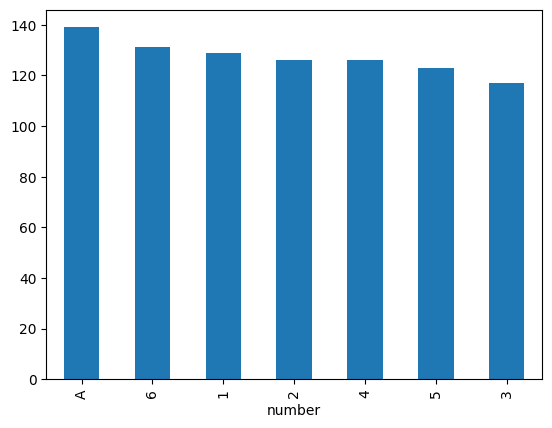

In [48]:
fig = df['number'].value_counts().plot.bar()
fig

In [49]:
df['number']

0      5
1      3
2      6
3      3
4      A
      ..
886    3
887    3
888    1
889    2
890    3
Name: number, Length: 891, dtype: object

In [50]:
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

df['number_numerical']

0      5.0
1      3.0
2      6.0
3      3.0
4      NaN
      ... 
886    3.0
887    3.0
888    1.0
889    2.0
890    3.0
Name: number_numerical, Length: 891, dtype: float64

In [51]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
df['number_categorical']

0      NaN
1      NaN
2      NaN
3      NaN
4        A
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: number_categorical, Length: 891, dtype: object

In [52]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


# Extract numrical values from categorical data

In [53]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADITYA\AppData\Local\Temp\ipykernel_36396\1497264368.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


In [54]:
df['cabin_cat'] = df['Cabin'].str[0]

In [55]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN
887,B42,112053,3,1,3.0,NaN,42,B
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN
889,C148,111369,2,1,2.0,NaN,148,C


In [68]:
# df['Ticket_numerica'] = df['Ticket'].str.extract('(\d+)')

df['Ticket_numerical'] = df['Ticket'].apply(lambda s : s.split()[-1])
df['Ticket_numerical'] = pd.to_numeric(df['Ticket_numerical'],errors='coerce',downcast='integer')



df['ticket_cat'] = df['Ticket'].apply(lambda s : s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,df['ticket_cat'])
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_numerical,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
